# Data exploration

This notebook presents the steps for fetching, loading, and exploring the Yahoo! Question-Answers dataset.

## Import modules

Modules are required to manipulate and verify data files, load the data (pandas), and for visualization (matplotlib).

In [1]:
import os
import hashlib
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

%matplotlib inline

## Constants

Assign path to dataset and expected file hash.

In [2]:
data_raw_md5sum = "f3f9899b997a42beb24157e62e3eea8d"
data_raw_path = os.path.abspath('../data/raw') + os.path.sep + "yahoo_answers_csv.tar.gz"

## Verify Dataset

Compare dataset hash calculated with md5sum to avoid errors from data corruption.

In [3]:
# Compare md5sum to avoid data corruption
# TODO : update with latest dataset
def check_data(path,datahash):
    # TODO: replace with chunk-based hash to reduce memory requirements.
    def checksum(file):
        def file_as_bytes(file):
            with file:
                return file.read()
        # Return md5 hash from file fully loaded in memory
        return hashlib.md5( file_as_bytes( open(file, 'rb') ) ).hexdigest()
    # Compare current datahash to reference hash to avoid data corruption
    if datahash == checksum(path):
        print('Dataset integrity check successful.')
    else:
        raise ValueError('Raw datafile checksum doesnt match original dataset. Download again yahoo_answers_csv.tar.gz into topics/data/raw.')
        
# Verify dataset integrity
check_data(data_raw_path,data_raw_md5sum)

Dataset integrity check successful.


# Load dataset

Three dataframes are extracted from the dataset:

Dataframe | Description 
:----------|:-------------
`df_train`  | Training set containing classes ids, titles, question text, answers. 
`df_test`   | Test set containing classes, titles, question text, answers.     
`df_class`  | List of classes for classes ids mappping.                                                 

In [4]:
# Open dataset tar file
with tarfile.open(data_raw_path, "r:*") as tar:
    df_train = pd.read_csv(tar.extractfile('yahoo_answers_csv/train.csv'),names=['classid','title','qtext','answer'], sep=",")
    df_test  = pd.read_csv(tar.extractfile('yahoo_answers_csv/test.csv'),names=['classid','title','qtext','answer'], sep=",")
    df_classes = pd.read_csv(tar.extractfile('yahoo_answers_csv/classes.txt'), names=['class'], sep=",")

#Readily merge the class names with the class IDs to ease data exploration.
df_classes['classid']=df_classes.index.values+1
df_train = df_train.merge(df_classes,on='classid')
df_test  = df_test.merge(df_classes,on='classid')

pass

In [5]:
# Show some statistics
print(f"Number of classes: {df_classes.size}")
print(f"Training samples (Q/T/A): {df_train.size}")
print(f"Test samples (Q/T/A): {df_test.size}")

Number of classes: 20
Training samples (Q/T/A): 7000000
Test samples (Q/T/A): 300000


## Start with the basics: show some samples

First, show some samples of text to see where we're going. Some things stand out:
 - Text samples mostly show colloquial formulation and syntax.
 - Samples contain abbreviations, web pages, and repeated accentuations.
 - There are empty question text records.

In [5]:
df_train.sample(frac=1).groupby('class').first()

,classid,title,qtext,answer
class,,,,
Business & Finance,7,"i have 40,000 pakistani rupees, how can i get ...",l worry about almost every thing around me whi...,Buy Euros...or another currency that will move...
Computers & Internet,5,alt powerbuilder datawindow how?,The LINKSYS wireless G router with 54mbps(what...,In powerbuilder you already have the datawindo...
Education & Reference,4,how do i use a Lensatic Marching Compass?,What are the institutes offereing training for...,Pictures of a Lensatic Marching Compass\nhttp:...
Entertainment & Music,8,Can there ever be enough questions about poopy?,I work on a psychic line for a living. Everyth...,"Yes, there can be too many."
Family & Relationships,9,What would you do if the love of your life mov...,He was the best thing ever and I never got to ...,"Then tell him, distance relationships can and ..."
Health,3,Do you still grow even you're 18?,"how to help a friend, a former drug addict to ...","Yes, for a male, it won't stop until you're 21..."
Politics & Government,10,How can I get a duplicate copy of my Tarrant C...,I have paid it and have the cancelled check bu...,"Simply write to Tarrant County, and ask for a ..."
Science & Mathematics,2,What type of living thing is a kaka beak found...,He was at the Pottsdam meeting with churchill ...,"It's a plant, the name refers to the flowers t..."
Society & Culture,1,14 year-olds ONLY... What is the most importan...,The reason why I'm asking 14 year-olds only is...,"i think about my boyfriend, my family, music, ..."


## Further exploration

Explanations for the following text exploration methods can be found here: https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571.

### Compare Text Length
Text fields statistics shows titles are short, around 40 characters, and span to up to 120 characters. Question text spans to 1000 characters and answers up to 4000 characters, however shorter texts are more frequent. The training and test distribution are similar.

## Text Length

### Training data distribution

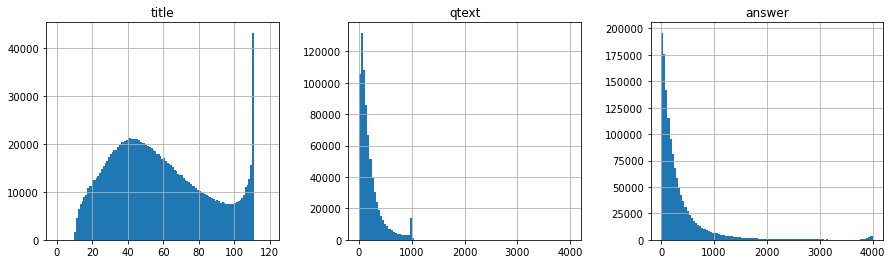

### Test data distribution

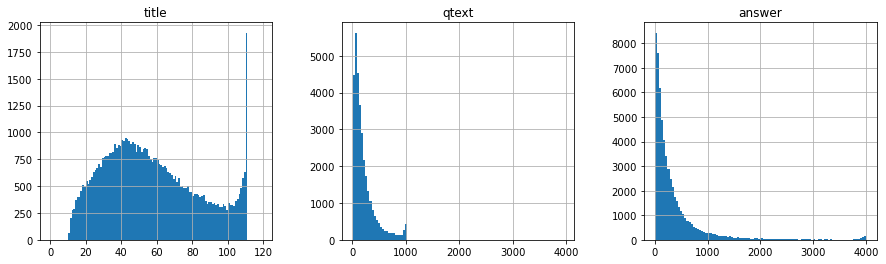

In [6]:
# Include markdown in figures to increase readability
display(Markdown("## Text Length"))
display(Markdown("### Training data distribution"))
# Training set figures
fig, axes = plt.subplots(1, 3,figsize=(15,4))
df_train['title'].str.len().to_frame().hist("title", bins=range(120), ax=axes[0])
df_train['qtext'].str.len().to_frame().hist("qtext", bins=100, ax=axes[1])
df_train['answer'].str.len().to_frame().hist("answer", bins=100, ax=axes[2])
plt.show()
# Test set figures
display(Markdown("### Test data distribution"))
fig, axes = plt.subplots(1, 3,figsize=(15,4))
df_test['title'].str.len().to_frame().hist("title", bins=range(120), ax=axes[0])
df_test['qtext'].str.len().to_frame().hist("qtext", bins=100, ax=axes[1])
df_test['answer'].str.len().to_frame().hist("answer", bins=100, ax=axes[2])
pass

### Compare Sequences Length

Naive sentence split show sequences length of up to 25 words for titles, up to 200 words for question text and up to 300-400 words for answers. *This allow to set an appropriate limit for the languange model sequences, or to select a pre-trained model appropriate for this length.*

## Number of words

### Training data distribution

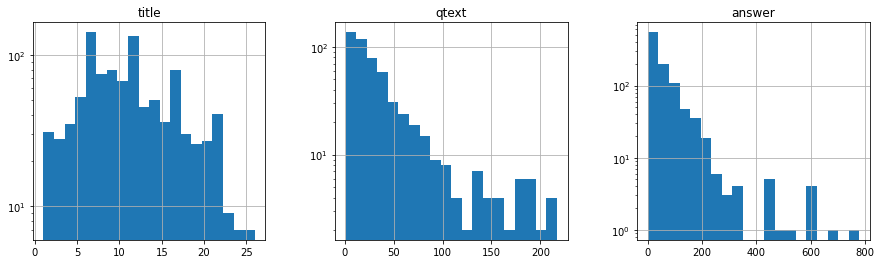

### Test data distribution

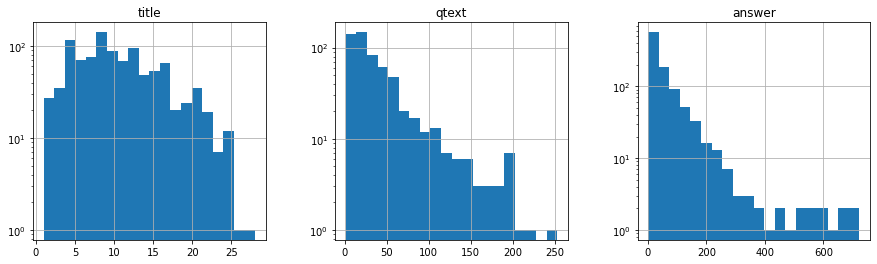

In [11]:
import numpy as np
# Include markdown in figures to increase readability
display(Markdown("## Number of words"))
# Training set figures
def show_words_lengths(df):
    fig, axes = plt.subplots(1, 3,figsize=(15,4))
    axes[0].set_yscale('log')
    df['title'].str.split().\
       apply(lambda x : len(x)). \
       to_frame().hist('title',bins=20,ax=axes[0])
    axes[1].set_yscale('log')
    df['qtext'].dropna().str.split().\
       apply(lambda x : len(x)). \
       to_frame().hist('qtext',bins=20,ax=axes[1])
    axes[2].set_yscale('log')
    df['answer'].dropna().str.split().\
       apply(lambda x : len(x)). \
       to_frame().hist('answer',bins=20,ax=axes[2])
    plt.show()

display(Markdown("### Training data distribution"))
show_words_lengths(df_train.sample(1000))
display(Markdown("### Test data distribution"))
show_words_lengths(df_test.sample(1000))
pass

## Words Lengths

### Training data distribution

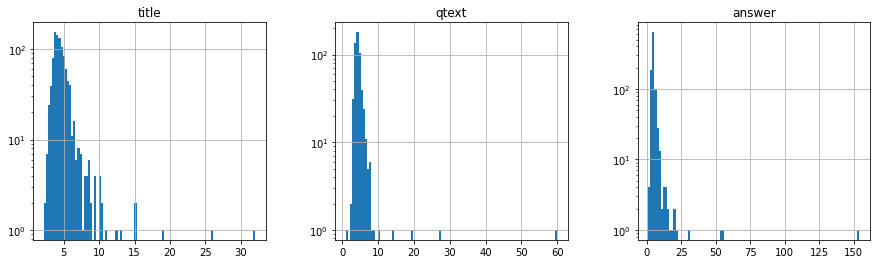

### Test data distribution

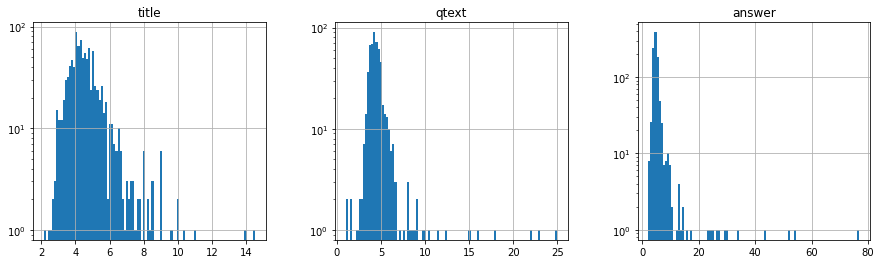

In [8]:
import numpy as np
# Include markdown in figures to increase readability
display(Markdown("## Words Lengths"))
# Training set figures
def show_words_lengths(df):
    fig, axes = plt.subplots(1, 3,figsize=(15,4))
    axes[0].set_yscale('log')
    df['title'].str.split().\
       apply(lambda x : [len(i) for i in x]). \
       map(lambda x: np.mean(x)).to_frame().hist('title',bins=100,ax=axes[0])
    axes[1].set_yscale('log')
    df['qtext'].dropna().str.split().\
       apply(lambda x : [len(i) for i in x]). \
       map(lambda x: np.mean(x)).to_frame().hist('qtext',bins=100,ax=axes[1])
    axes[2].set_yscale('log')
    df['answer'].dropna().str.split().\
       apply(lambda x : [len(i) for i in x]). \
       map(lambda x: np.mean(x)).to_frame().hist('answer',bins=100,ax=axes[2])
    plt.show()

display(Markdown("### Training data distribution"))
show_words_lengths(df_train.sample(1000))
display(Markdown("### Test data distribution"))
show_words_lengths(df_test.sample(1000))
pass

In [9]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'stopwords' is not defined

In [ ]:
corpus=[]
new= news['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)